In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from bubble_plot.bubble_plot import bubble_plot
import numpy as np
import seaborn as sns
from IPython.display import display
from sklearn.feature_extraction import FeatureHasher
pd.options.display.max_columns = None
import re
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import shap

what can be done more:


    features engineerin, cluster club by another data source
    
    fillna better

In [2]:
test = pd.read_csv("C:/Users/davidog16/Downloads/test_data.csv",index_col=0)

train = pd.read_csv("C:/Users/davidog16/Downloads/train_data.csv",index_col=0)

In [3]:
train.shape

(14565, 88)

In [4]:
train.drop_duplicates().shape

(14565, 88)

In [5]:
test.shape

(3642, 87)

In [6]:
test.drop_duplicates().shape

(3642, 87)

In [7]:
display(train.head())

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,184338,G. Bellusci,28,https://cdn.sofifa.org/players/4/19/184338.png,Italy,https://cdn.sofifa.org/flags/27.png,70,70,Palermo,https://cdn.sofifa.org/teams/2/light/1843.png,EURO1.4M,3000,1694,Right,1.0,3.0,2.0,High/ Medium,Normal,No,RCB,2.0,"Aug 3, 2017",NaN,2020,6'0,176lbs,54+2,54+2,54+2,52+2,54+2,54+2,54+2,52+2,54+2,54+2,54+2,54+2,58+2,58+2,58+2,54+2,61+2,66+2,66+2,66+2,61+2,63+2,68+2,68+2,68+2,63+2,38.0,40.0,64.0,60.0,26.0,59.0,48.0,60.0,61.0,60.0,54.0,58.0,60.0,63.0,68.0,71.0,59.0,69.0,70.0,59.0,89.0,70.0,36.0,50.0,40.0,66.0,70.0,70.0,70.0,9.0,6.0,14.0,8.0,15.0,EURO2.3M
2,215593,D. Kort,23,https://cdn.sofifa.org/players/4/19/215593.png,Poland,https://cdn.sofifa.org/flags/37.png,68,75,Wisła Kraków,https://cdn.sofifa.org/teams/2/light/1873.png,EURO1.3M,3000,1697,Right,1.0,3.0,3.0,Medium/ Medium,Lean,No,RDM,7.0,"Jun 23, 2018",NaN,2019,5'9,143lbs,60+2,60+2,60+2,64+2,65+2,65+2,65+2,64+2,66+2,66+2,66+2,64+2,63+2,63+2,63+2,64+2,53+2,52+2,52+2,52+2,53+2,50+2,45+2,45+2,45+2,50+2,53.0,55.0,49.0,67.0,47.0,67.0,65.0,60.0,65.0,69.0,67.0,66.0,71.0,63.0,79.0,70.0,74.0,63.0,39.0,73.0,55.0,36.0,60.0,72.0,49.0,67.0,31.0,40.0,39.0,9.0,8.0,8.0,12.0,16.0,EURO1.9M
3,179579,T. Nowak,32,https://cdn.sofifa.org/players/4/19/179579.png,Poland,https://cdn.sofifa.org/flags/37.png,65,65,Zagłębie Sosnowiec,https://cdn.sofifa.org/teams/2/light/111089.png,EURO425K,2000,1790,Left,1.0,3.0,3.0,High/ Medium,Stocky,No,CAM,6.0,"Jul 1, 2016",NaN,2019,5'7,159lbs,59+2,59+2,59+2,62+2,61+2,61+2,61+2,62+2,63+2,63+2,63+2,63+2,63+2,63+2,63+2,63+2,60+2,60+2,60+2,60+2,60+2,58+2,56+2,56+2,56+2,58+2,61.0,49.0,48.0,70.0,62.0,61.0,68.0,45.0,69.0,67.0,70.0,73.0,78.0,57.0,76.0,66.0,67.0,64.0,72.0,68.0,59.0,63.0,56.0,60.0,67.0,68.0,49.0,45.0,47.0,16.0,10.0,8.0,13.0,6.0,EURO574K
4,228009,Lee Gyu Seong,24,https://cdn.sofifa.org/players/4/19/228009.png,Korea Republic,https://cdn.sofifa.org/flags/167.png,57,62,Sangju Sangmu FC,https://cdn.sofifa.org/teams/2/light/2055.png,EURO140K,1000,1516,Right,1.0,3.0,3.0,High/ Medium,Normal,No,CAM,37.0,"Jan 1, 2015",NaN,2019,5'8,146lbs,49+2,49+2,49+2,55+2,54+2,54+2,54+2,55+2,56+2,56+2,56+2,57+2,55+2,55+2,55+2,57+2,53+2,52+2,52+2,52+2,53+2,52+2,48+2,48+2,48+2,52+2,47.0,36.0,37.0,63.0,39.0,61.0,44.0,39.0,60.0,61.0,73.0,75.0,60.0,56.0,77.0,50.0,51.0,55.0,56.0,36.0,56.0,44.0,42.0,55.0,50.0,58.0,44.0,43.0,45.0,16.0,15.0,14.0,8.0,8.0,EURO186K
5,49045,K. Boyd,34,https://cdn.sofifa.org/players/4/19/49045.png,Scotland,https://cdn.sofifa.org/flags/42.png,72,72,Kilmarnock,https://cdn.sofifa.org/teams/2/light/82.png,EURO1.6M,7000,1703,Right,1.0,4.0,2.0,Medium/ Low,Stocky,Yes,ST,9.0,"Jul 1, 2015",NaN,2019,6'1,183lbs,70+2,70+2,70+2,62+2,65+2,65+2,65+2,62+2,63+2,63+2,63+2,60+2,58+2,58+2,58+2,60+2,44+2,48+2,48+2,48+2,44+2,42+2,46+2,46+2,46+2,42+2,55.0,75.0,74.0,64.0,67.0,55.0,60.0,67.0,57.0,70.0,40.0,46.0,64.0,73.0,61.0,80.0,66.0,54.0,88.0,67.0,68.0,14.0,79.0,53.0,75.0,76.0,45.0,19.0,18.0,9.0,11.0,8.0,14.0,7.0,EURO2.9M


In [8]:
display(test.head())

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,EURO110.5M,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,EURO226.5M
2,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,EURO102M,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,EURO196.4M
3,182493,D. Godín,32,https://cdn.sofifa.org/players/4/19/182493.png,Uruguay,https://cdn.sofifa.org/flags/60.png,90,90,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,EURO44M,1946,Right,3.0,3.0,2.0,Medium/ High,Lean,Yes,CB,10.0,"Aug 4, 2010",NaN,2019,6'2,172lbs,64+3,64+3,64+3,61+3,62+3,62+3,62+3,61+3,62+3,62+3,62+3,63+3,68+3,68+3,68+3,63+3,76+3,81+3,81+3,81+3,76+3,79+3,87+3,87+3,87+3,79+3,55.0,42.0,92.0,79.0,47.0,53.0,49.0,51.0,70.0,76.0,68.0,68.0,58.0,85.0,54.0,67.0,91.0,66.0,88.0,43.0,89.0,88.0,48.0,52.0,50.0,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,EURO90.2M
4,215914,N. Kanté,27,https://cdn.sofifa.org/players/4/19/215914.png,France,https://cdn.sofifa.org/flags/18.png,89,90,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,EURO63M,2189,Right,3.0,3.0,2.0,Medium/ High,Lean,Yes,LDM,13.0,"Jul 16, 2016",NaN,2023,5'6,159lbs,72+3,72+3,72+3,77+3,77+3,77+3,77+3,77+3,79+3,79+3,79+3,79+3,82+3,82+3,82+3,79+3,85+3,87+3,87+3,87+3,85+3,84+3,83+3,83+3,83+3,84+3,68.0,65.0,54.0,86.0,56.0,79.0,49.0,49.0,81.0,80.0,82.0,78.0,82.0,93.0,92.0,71.0,77.0,96.0,76.0,69.0,90.0,92.0,71.0,79.0,54.0,85.0,90.0,91.0,85.0,15.0,12.0,10.0,7.0,10.0,EURO121.3M
5,190460,C. Eriksen,26,https://cdn.sofifa.org/players/4/19/190460.png,Denmark,https://cdn.sofifa.org/flags/13.png,88,91,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,EURO73.5M,2117,Right,3.0,5.0,4.0,High/ Medium,Lean,Yes,CAM,10.0,"Aug 30, 2013",NaN,2020,5'11,168lbs,79+3,79+3,79+3,84+3,84+3,84+3,84+3,84+3,86+3,86+3,86+3,85+3,85+3,85+3,85+3,85+3,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3,88.0,80.0,52.0,91.0,77.0,84.0,86.0,87.0,88.0,91.0,75.0,73.0,79.0,88.0,81.0,84.0,50.0,92.0,58.0,89.0,46.0,56.0,83.0,91.0,67.0,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,EURO141.5M


In [9]:
train.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [10]:
display(train.describe())

,ID,Age,Overall,Potential,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,14565.000000,14565.000000,14565.000000,14565.000000,14565.000000,14565.000000,14528.000000,14528.000000,14528.000000,14518.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000
mean,214278.581050,25.114796,66.244765,71.307999,9748.438036,1597.722485,1.112885,2.948513,2.362610,19.457845,49.728249,45.562982,52.193695,58.688601,42.867497,55.353042,47.164028,42.910036,52.745182,58.347192,64.650193,64.735476,63.550661,61.861991,63.960903,55.459939,65.051143,63.217442,65.289579,47.146063,55.842029,46.674697,49.948720,53.413959,48.534279,58.642965,47.193901,47.630231,45.595884,16.654942,16.437225,16.308921,16.418846,16.737541
std,30006.792442,4.657465,6.913453,6.151805,22017.823603,273.219478,0.394328,0.660392,0.757595,15.831054,18.363274,19.539833,17.430453,14.721183,17.719571,18.952859,18.448677,17.498524,15.356798,16.725215,14.956365,14.663825,14.771108,8.995920,14.159025,17.299918,11.817603,15.882671,12.549583,19.282144,17.392137,20.681679,19.551681,14.168489,15.691616,11.454006,19.955893,21.677813,21.307218,17.745319,16.946936,16.566363,17.073576,18.005384
min,80.000000,16.000000,46.000000,48.000000,0.000000,731.000000,1.000000,1.000000,1.000000,1.000000,6.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,4.000000,9.000000,5.000000,12.000000,12.000000,14.000000,30.000000,16.000000,2.000000,15.000000,12.000000,17.000000,4.000000,11.000000,4.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.000000,21.000000,62.000000,67.000000,1000.000000,1459.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221788.000000,25.000000,66.000000,71.000000,3000.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,55.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,67.000000,66.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236515.000000,28.000000,71.000000,75.000000,9000.000000,1786.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,455000.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,92.000000,94.000000,94.000000,93.000000,90.000000,96.000000,94.000000,93.000000,93.000000,95.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,93.000000,9

In [11]:
test.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,3642.000000,3642.00000,3642.000000,3642.000000,3642.000000,3631.000000,3631.00000,3631.000000,3629.000000,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000
mean,214377.352554,25.15184,66.214443,71.304503,1598.159528,1.114569,2.94244,2.356100,19.899146,49.757918,45.502616,52.716056,58.679152,43.075186,55.442853,47.198017,42.675571,52.578904,58.458551,64.469568,64.692922,63.315340,61.735059,63.989259,55.460479,65.242633,63.229964,65.401542,46.965574,55.976866,46.792619,49.997521,53.348664,48.605894,58.669513,47.632608,47.968328,45.923712,16.461305,16.209033,15.924539,16.269072,16.604241
std,29802.478692,4.72004,6.891706,6.075722,270.074808,0.392891,0.66078,0.750493,16.403850,18.372037,19.472264,17.172214,14.614412,17.594816,18.741829,18.182474,17.400610,15.212953,16.533158,14.814020,14.596281,14.746321,9.068960,14.046250,16.990145,11.830195,15.945128,12.587967,19.175747,17.272887,20.760319,19.440798,14.061911,15.755755,11.365884,19.695827,21.609529,21.217527,17.495551,16.746829,16.244934,16.879904,17.754635
min,16.000000,16.00000,47.000000,52.000000,760.000000,1.000000,1.00000,1.000000,1.000000,5.000000,5.000000,8.000000,7.000000,5.000000,4.000000,6.000000,3.000000,9.000000,9.000000,14.000000,15.000000,18.000000,21.000000,16.000000,6.000000,16.000000,15.000000,24.000000,3.000000,11.000000,3.000000,3.000000,11.000000,7.000000,12.000000,5.000000,8.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200322.250000,21.00000,62.000000,67.000000,1452.000000,1.000000,3.00000,2.000000,9.000000,38.000000,30.000000,45.000000,53.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,56.000000,58.000000,55.000000,55.000000,56.000000,45.000000,58.000000,55.000000,58.000000,33.000000,44.000000,26.000000,39.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221607.500000,25.00000,66.000000,71.000000,1636.000000,1.000000,3.00000,2.000000,17.000000,54.000000,48.000000,56.000000,62.000000,44.000000,61.000000,49.000000,41.000000,56.000000,63.000000,67.000000,67.000000,65.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,59.000000,53.000000,55.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236619.250000,29.00000,71.000000,75.000000,1789.000000,1.000000,3.00000,3.000000,26.000000,64.000000,62.000000,65.000000,68.000000,57.000000,68.000000,61.000000,56.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,65.000000,64.000000,61.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246616.000000,41.00000,94.000000,94.000000,2281.000000,5.000000,5.00000,5.000000,99.000000,93.000000,95.000000,94.000000,92.000000,90.000000,97.000000,93.000000,94.000000,91.000000,96.000000,97.000000,94.000000,95.000000,95.000000,95.000000,92.000000,93.000000,96.000000,94.000000,94.000000,94.000000,92.000000,94.000000,94.000000,90.000000,96.000000,94.000000,91.000000,89.000000,90.000000,86.000000,85.000000,89.000000,90.000000


In [12]:
train.isnull().sum().sort_values(ascending=False).head()

Loaned From    13556
LWB             1680
LM              1680
CB              1680
LCB             1680
dtype: int64

In [3]:
train = train.drop('Loaned From',axis=1)
test = test.drop('Loaned From',axis=1)

## a lot of different missing columns, remove column Loaned 

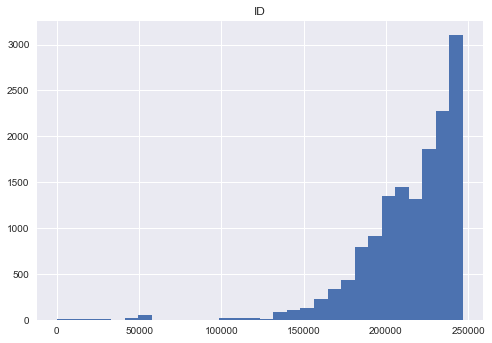

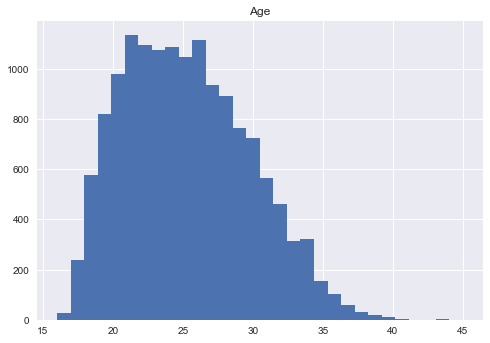

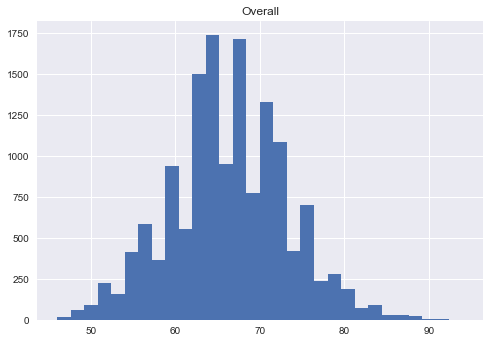

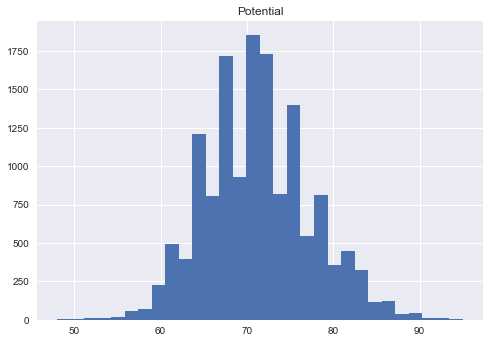

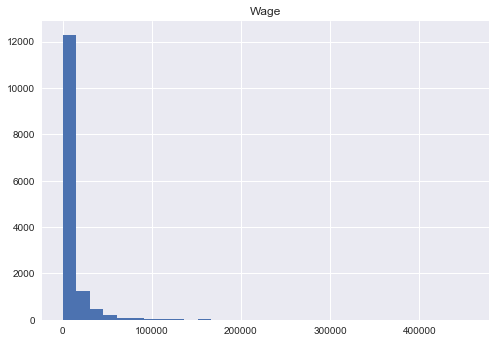

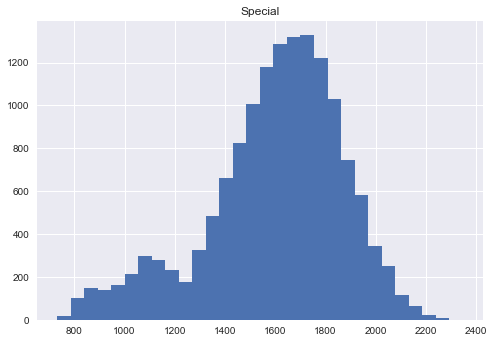

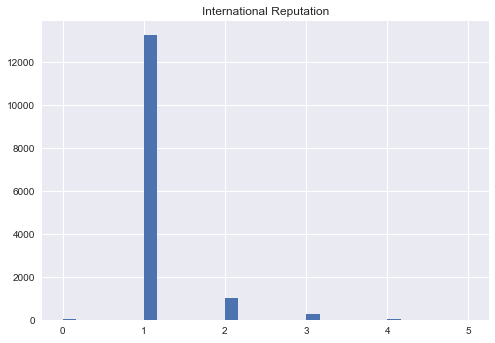

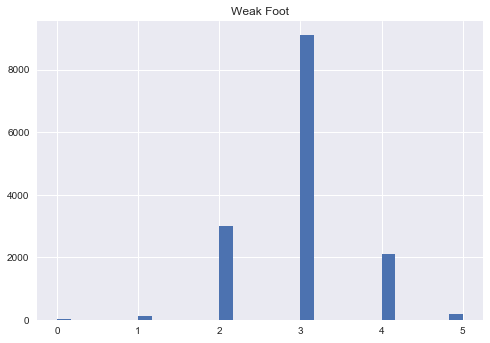

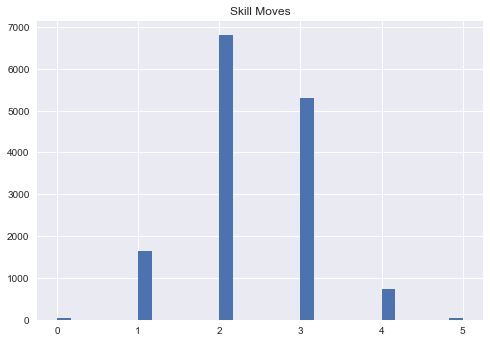

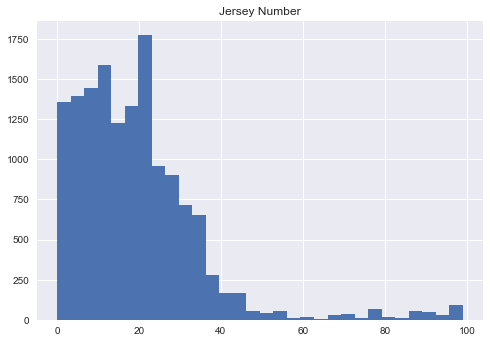

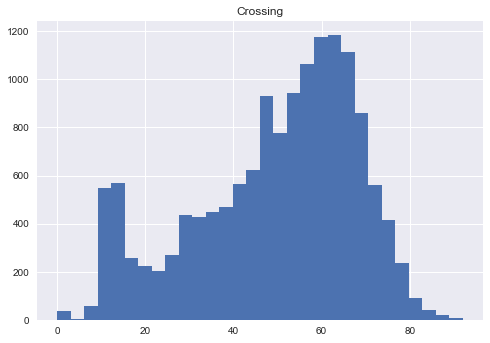

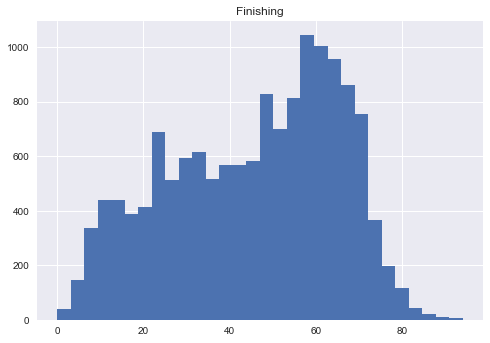

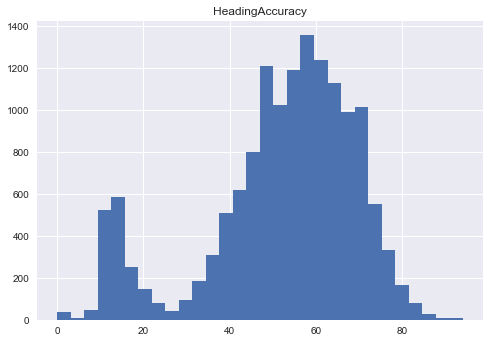

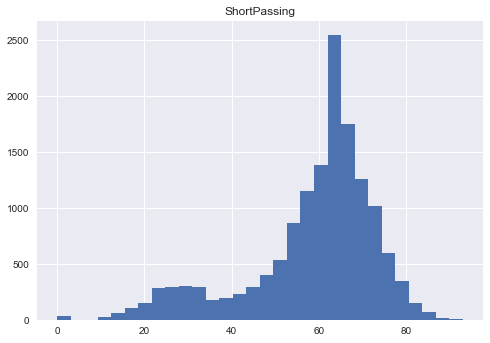

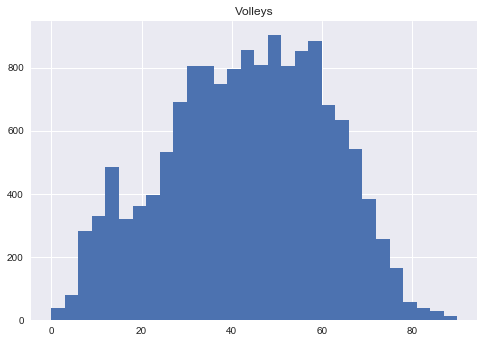

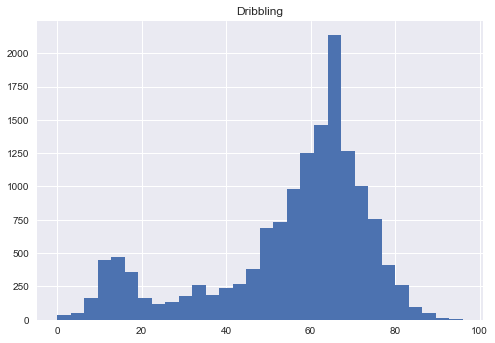

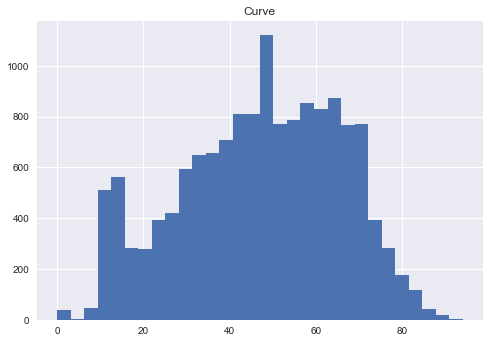

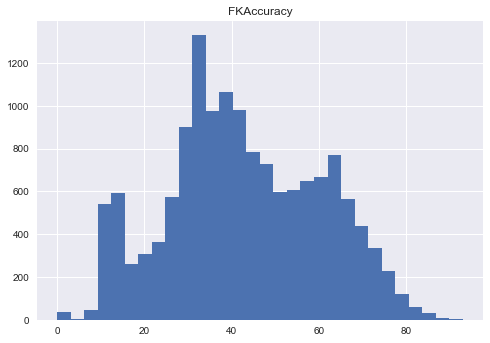

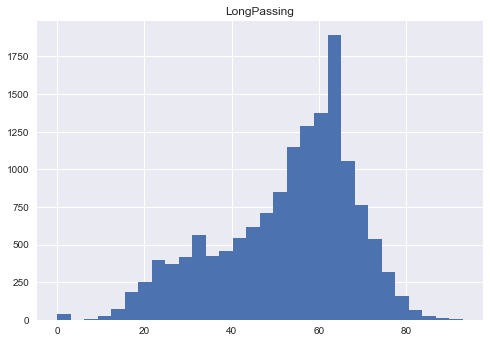

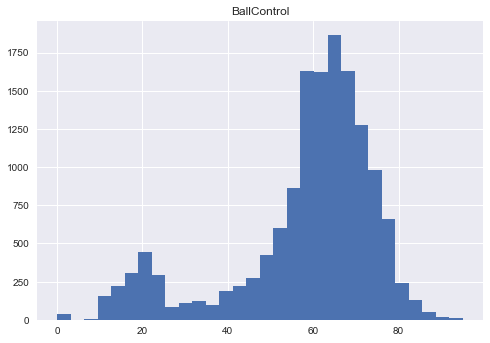

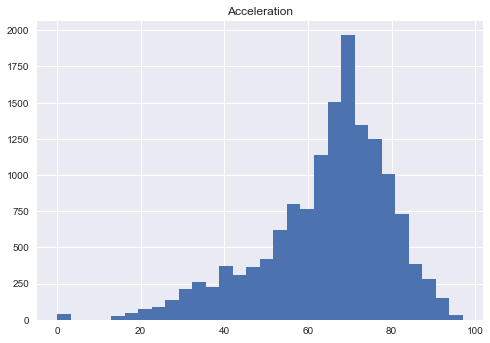

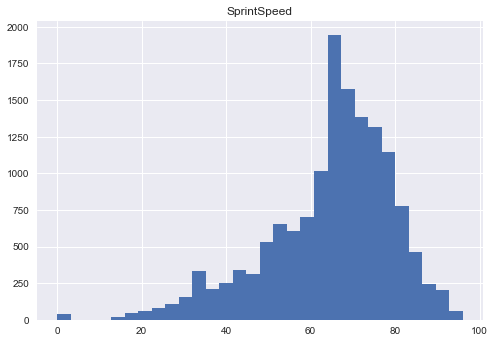

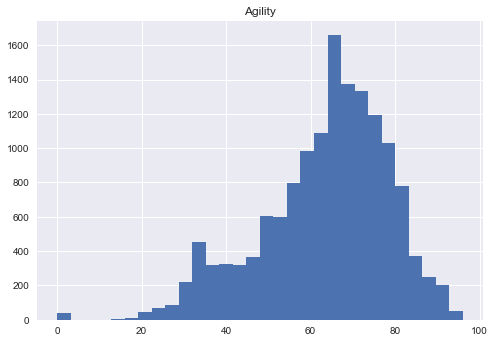

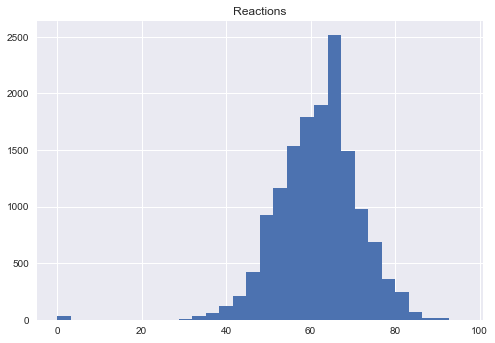

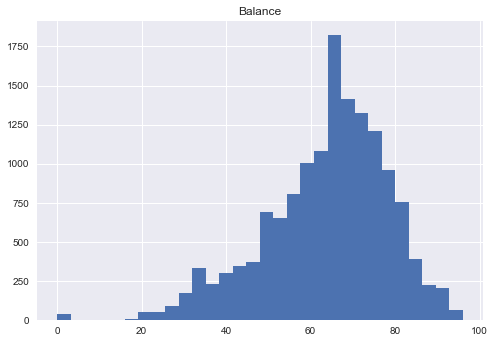

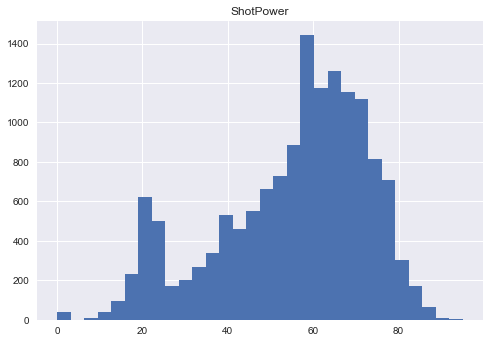

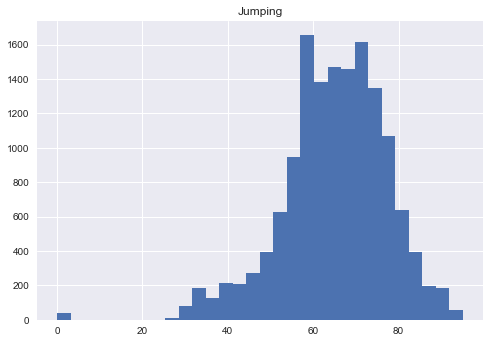

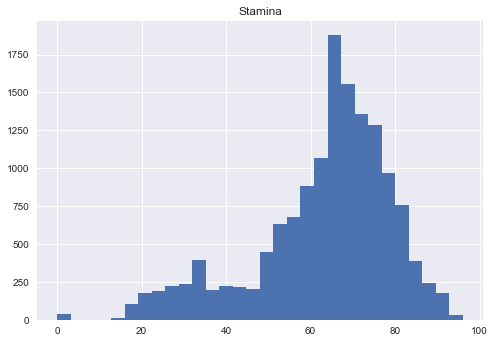

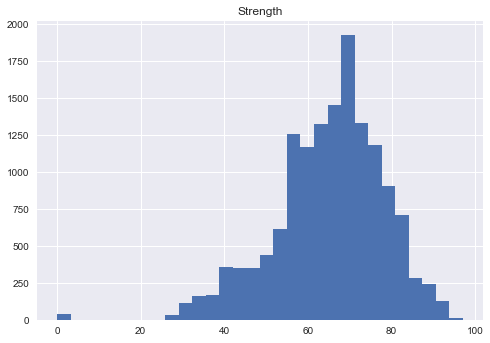

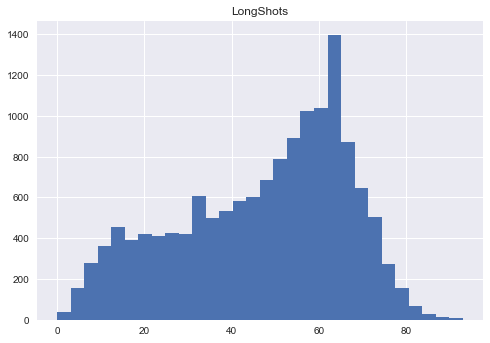

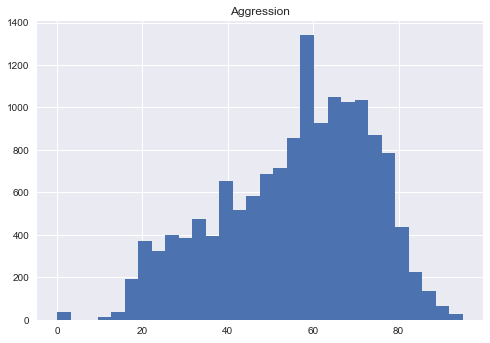

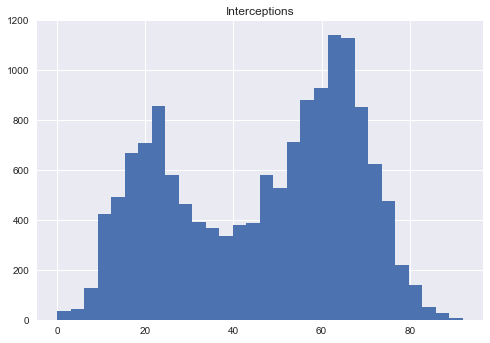

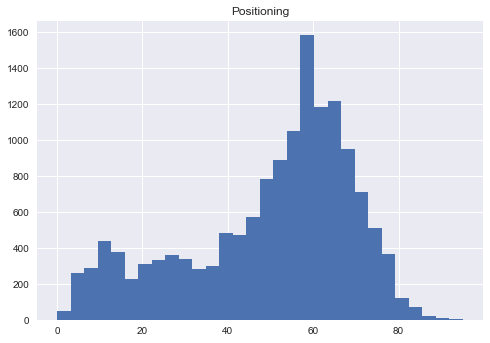

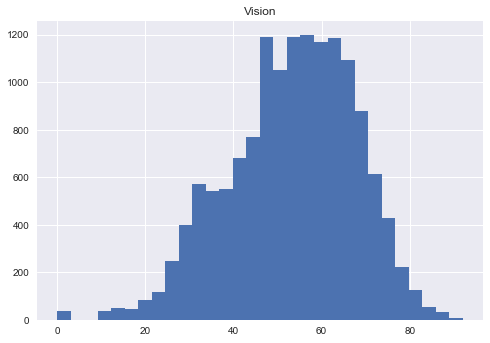

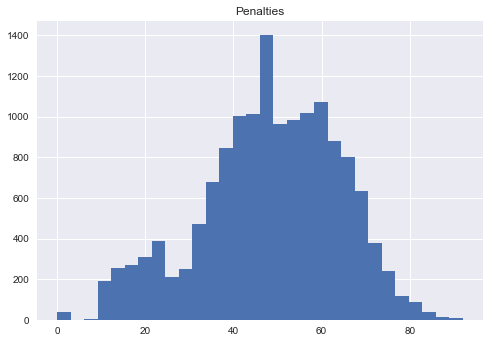

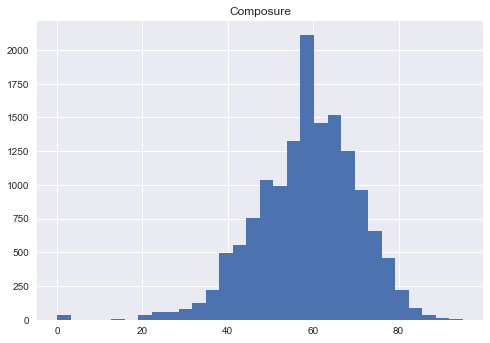

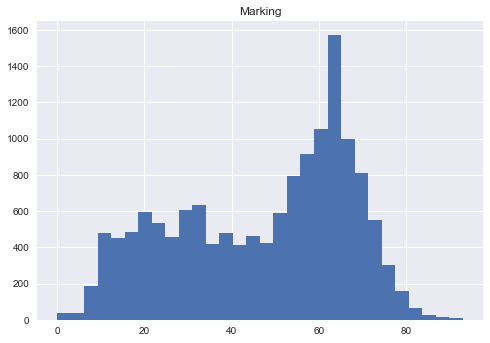

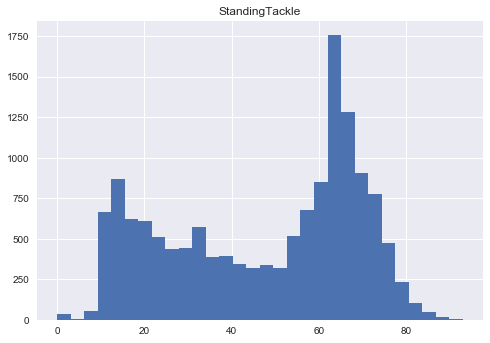

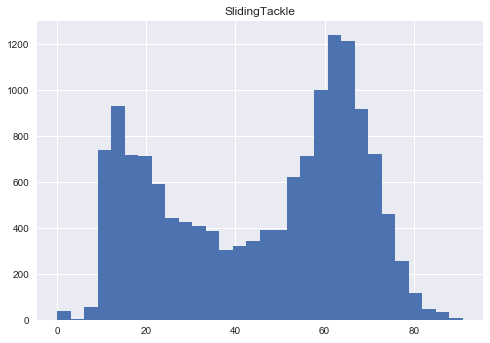

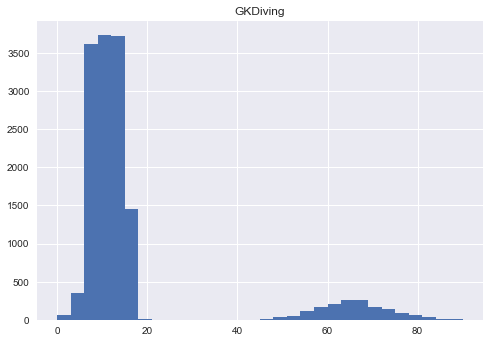

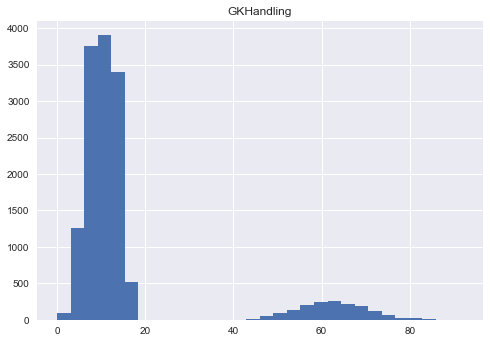

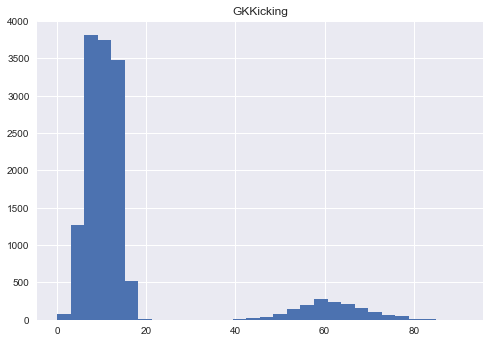

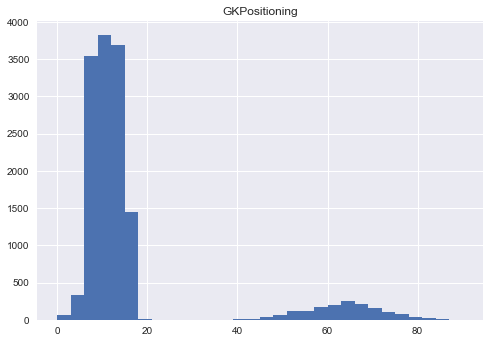

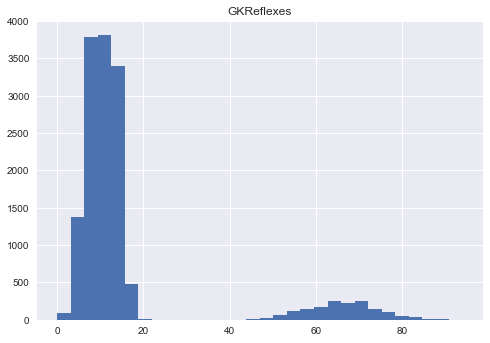

In [14]:
for col in train.select_dtypes(include=['int64','float64']).columns.tolist():
    
    plt.hist(train[col].fillna(0),bins=30)
    plt.title(col)
    plt.show()

hist insights:
        1. categorical features : "international reputation", "weak foot", "skill moves", ""
        2. most features are distribute nicley, but wage (we should try predicting its log) and all GK? features (which we could seperate into a binary flag or get more infromation about the meaning of the feature.).
        3. wage our label is distributed in a way that will be difficult to predict, should try predicting the log


In [4]:
raw_num_cols = test.select_dtypes(include=['int64','float64']).columns.tolist()
num_cols = [c for c in raw_num_cols if c not in ["International Reputation","Weak Foot", "Skill Moves","ID"]]

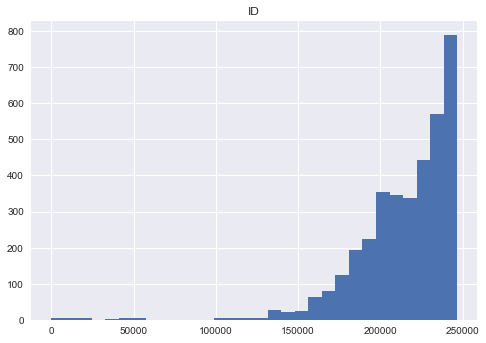

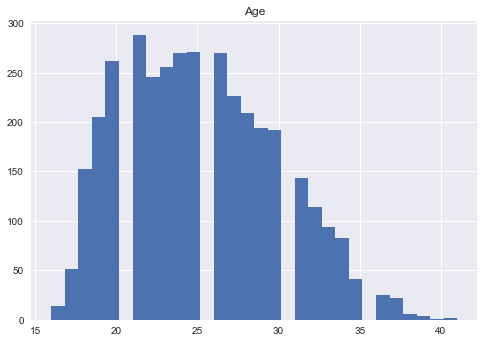

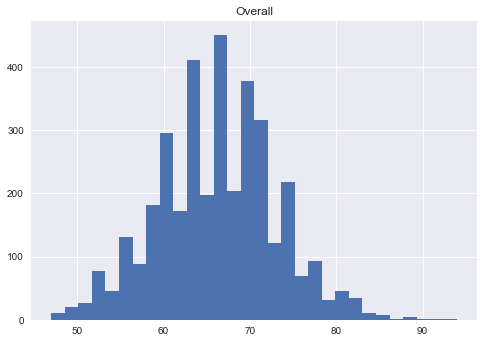

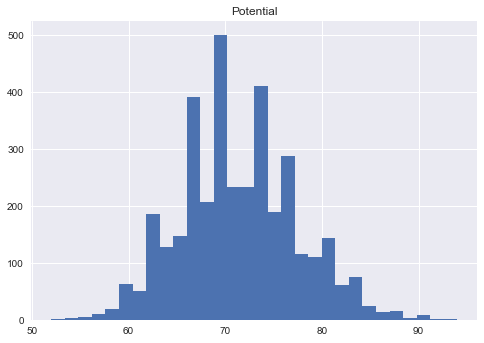

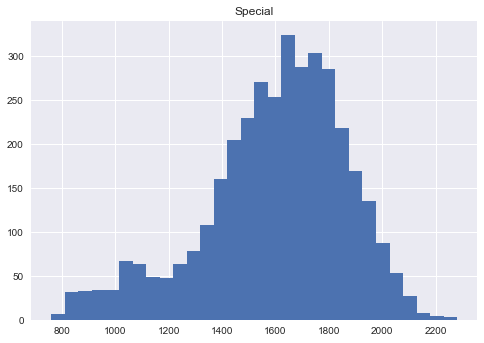

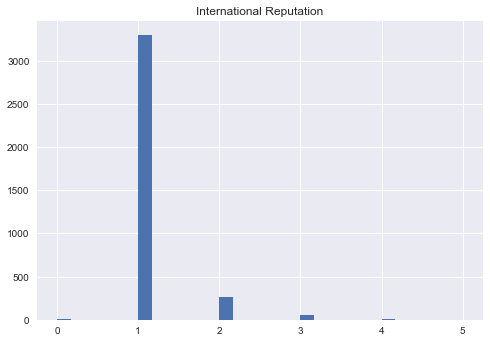

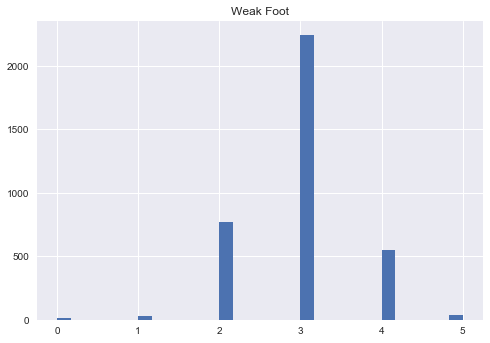

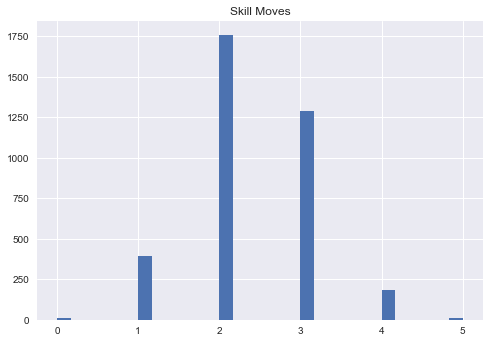

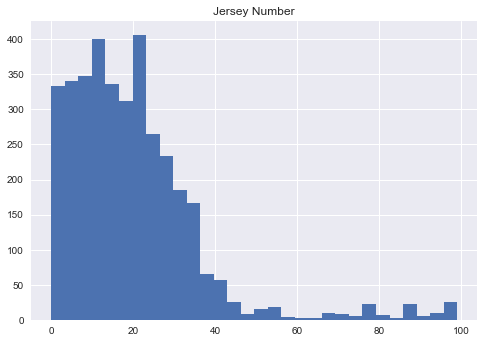

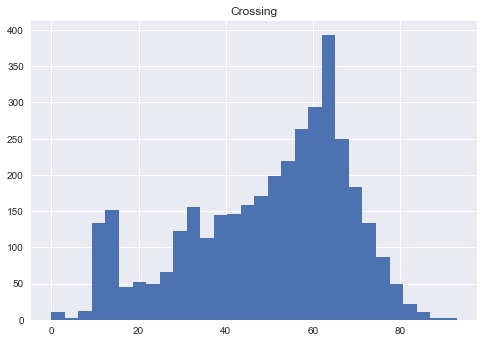

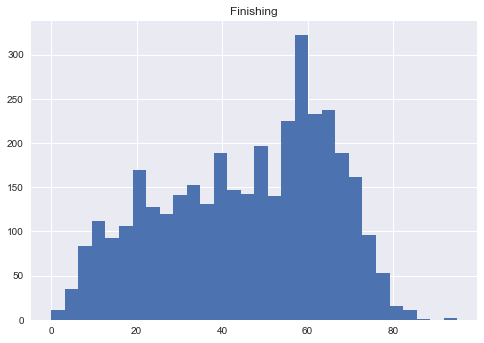

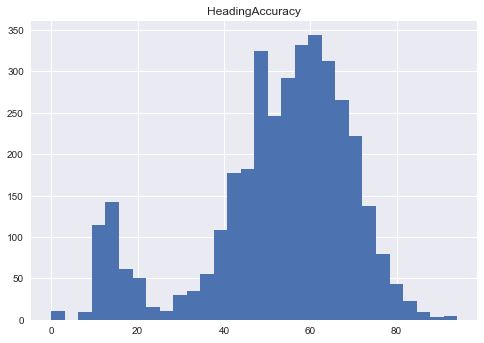

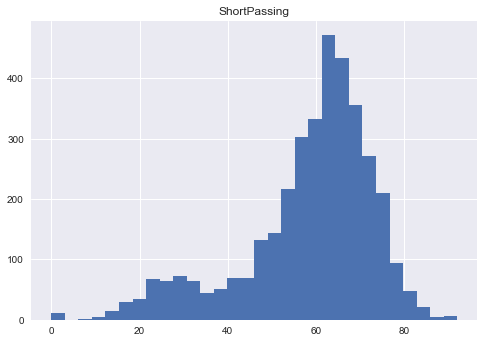

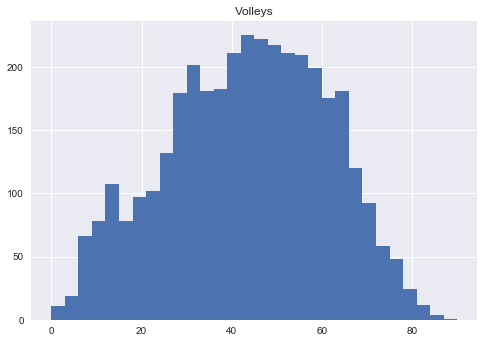

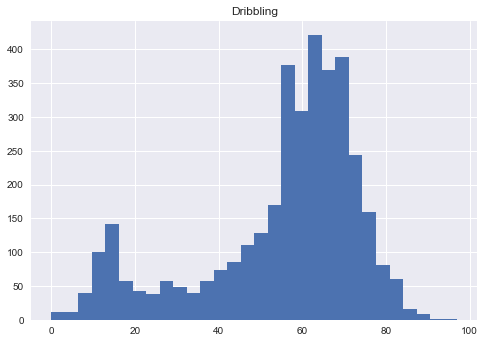

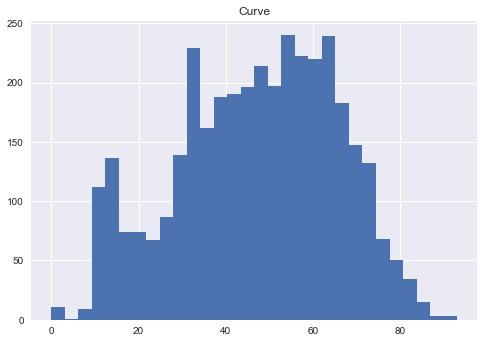

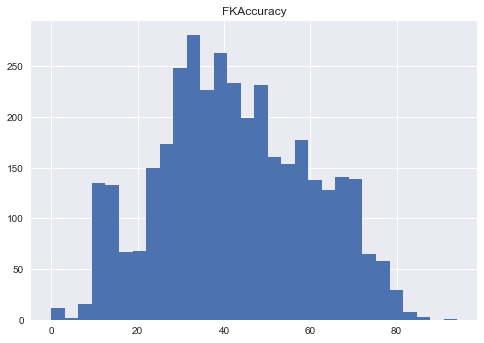

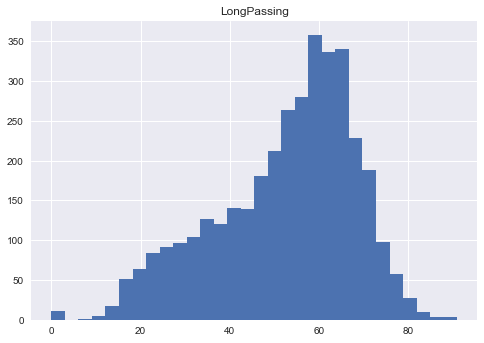

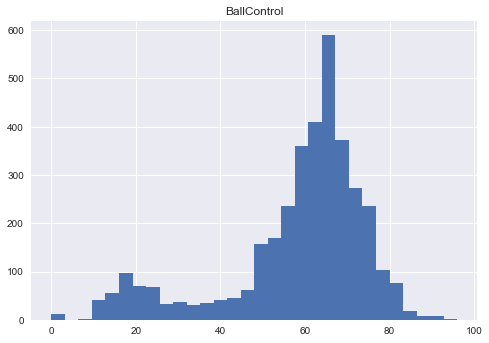

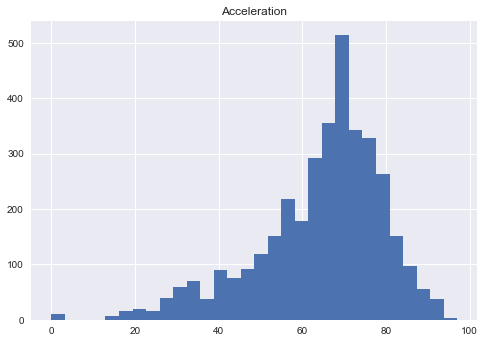

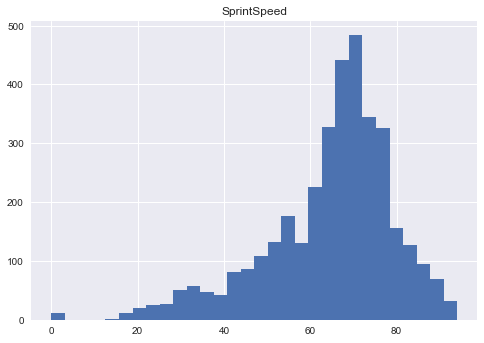

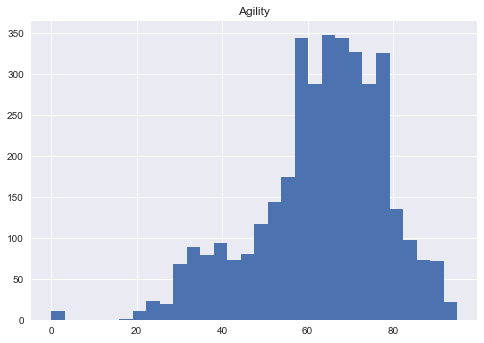

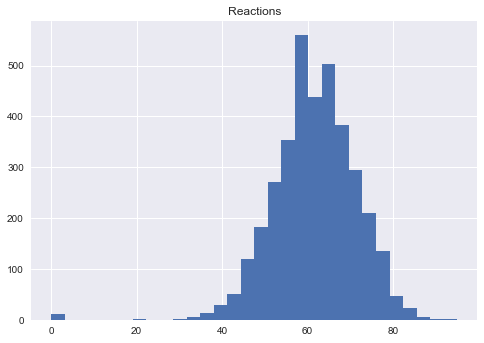

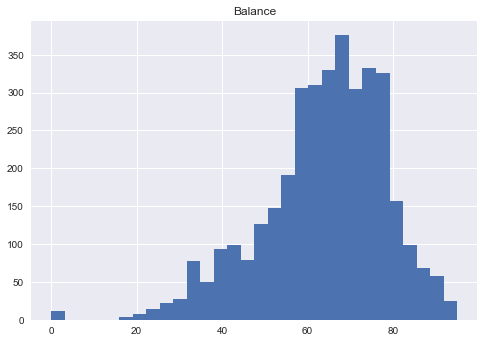

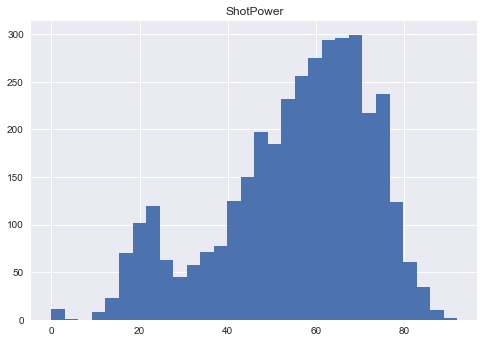

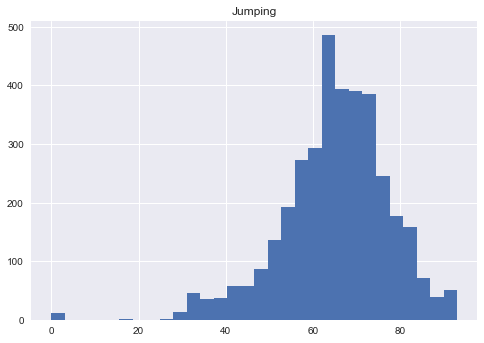

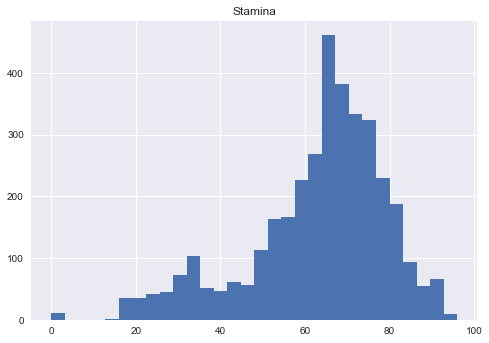

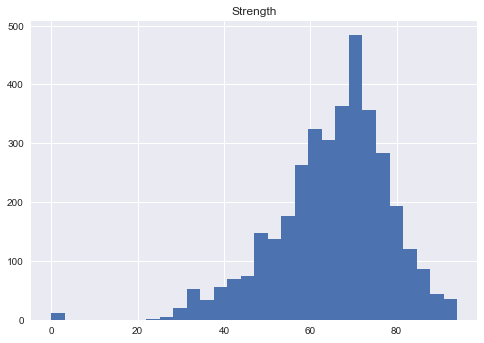

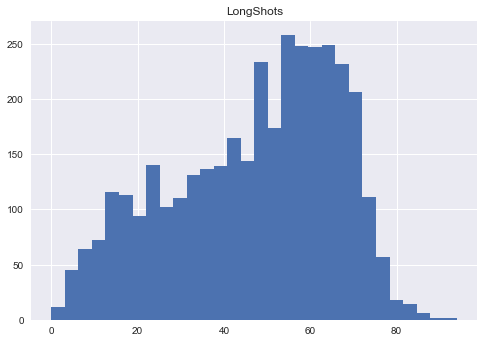

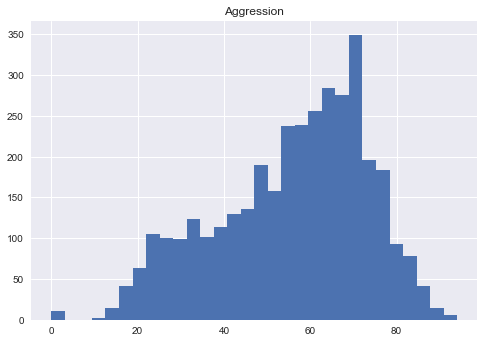

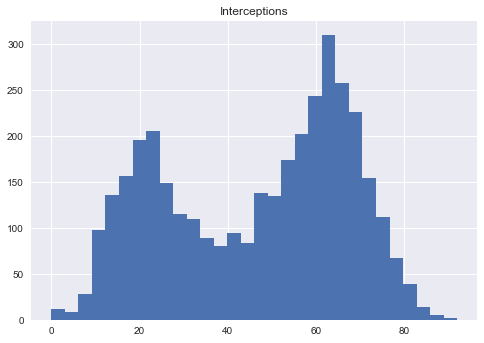

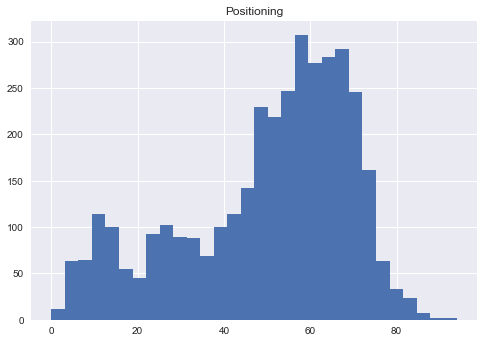

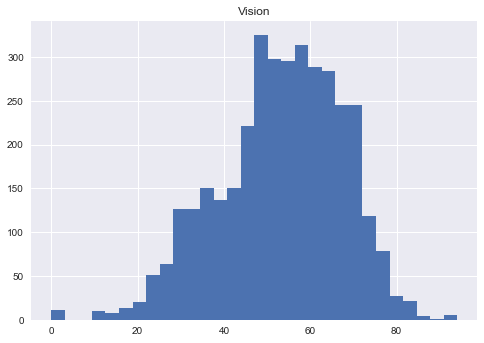

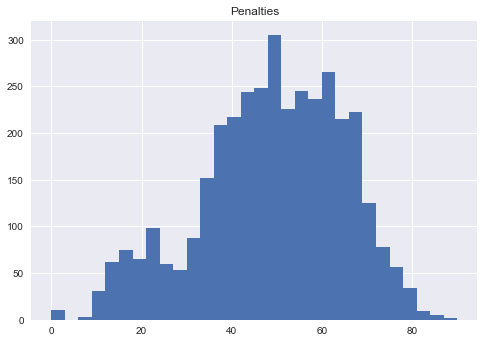

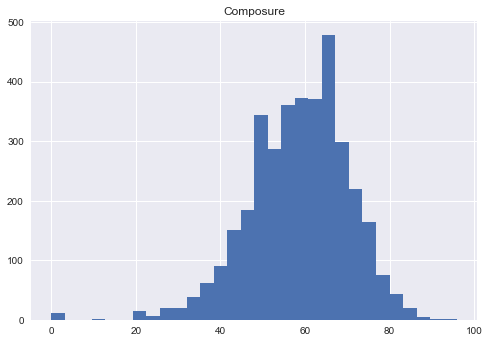

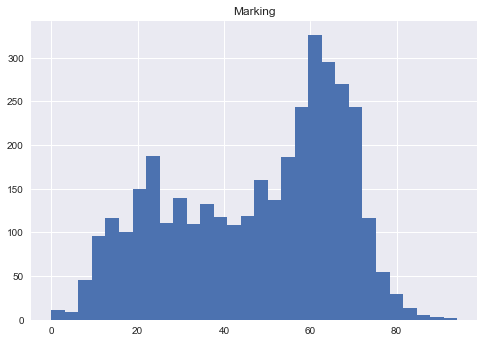

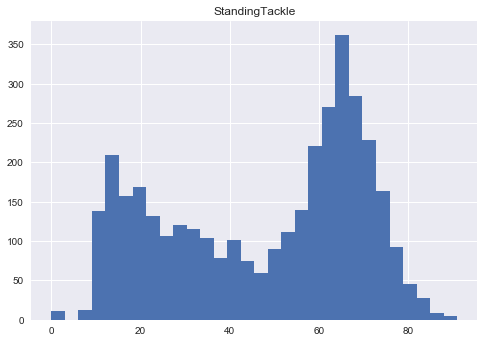

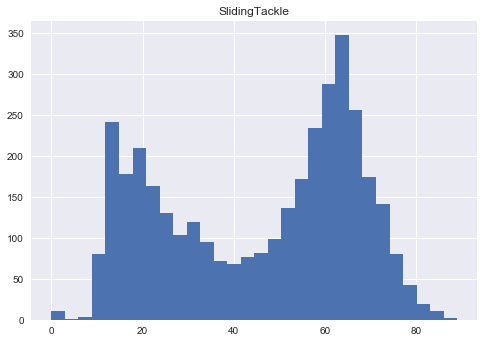

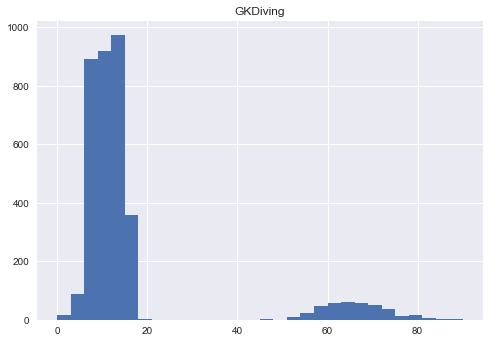

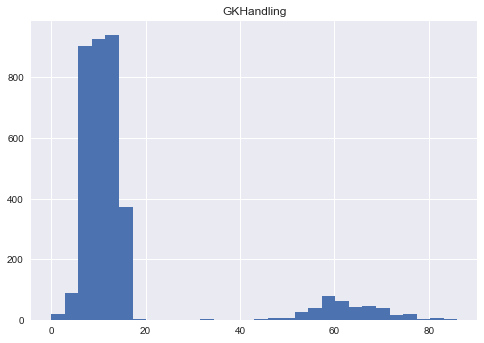

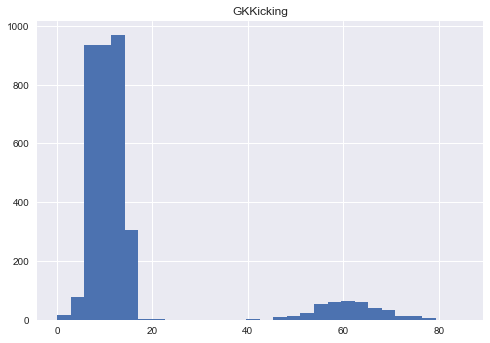

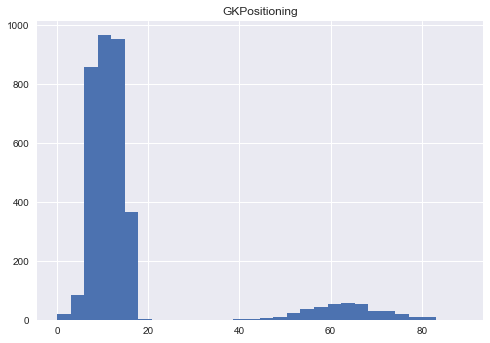

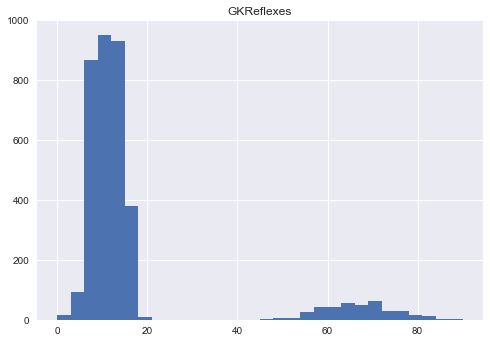

In [16]:
for col in test.select_dtypes(include=['int64','float64']).columns.tolist():
    plt.hist(test[col].fillna(0),bins=30)
    plt.title(col)
    plt.show()

looks like train and test distirute equaly (this could be further tested to be sure)

### pearson corr plot

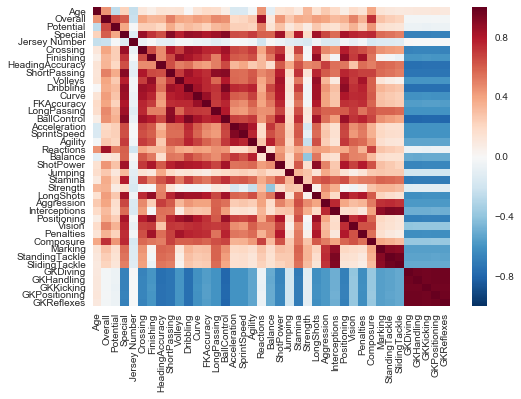

In [5]:
corr = train[num_cols].corr()
sns.heatmap(corr)
plt.show()

corr insights:
    1. many highy correlated features!

In [6]:
cor_df = corr.stack().sort_values(0).reset_index()
cor_df = cor_df[cor_df[0]!=1]


cor_df = cor_df.drop_duplicates([0]) # there is a better way of removing double duplicates

# removing one feature of couples that are highly correlated
COR_THRESH = 0.8
col_to_keep = cor_df[cor_df[0]<COR_THRESH].drop_duplicates('level_0')
col_to_keep = col_to_keep['level_0'].tolist()
num_cols = [c for c in col_to_keep if c in col_to_keep]

### categorical features

In [7]:
cat_cols = test.select_dtypes(include=['object']).columns.tolist()

check the number of uniques and thier distributions

In [20]:
for col in cat_cols:
    print("{}'s number of unique values: {} \n".format(col,train[col].nunique()))
    print(" and their distribution : \n")
    print(train[col].value_counts(normalize=True))
    print("\n")

Name's number of unique values: 13882 

 and their distribution : 

R. Williams       0.000481
Paulinho          0.000481
J. Rodríguez      0.000481
J. Hernández      0.000412
J. Williams       0.000343
J. Pérez          0.000343
J. Torres         0.000343
D. Williams       0.000343
L. Rodríguez      0.000343
A. González       0.000275
J. Valencia       0.000275
L. López          0.000275
R. González       0.000275
M. Herrera        0.000275
Fernando          0.000275
M. López          0.000275
M. Dembélé        0.000275
J. Jones          0.000275
J. Martínez       0.000275
L. Kelly          0.000275
Felipe            0.000275
G. Rodríguez      0.000275
D. Johnson        0.000275
J. Gómez          0.000275
Danilo            0.000275
Carlitos          0.000275
J. Mosquera       0.000275
Y. Kobayashi      0.000275
M. Gómez          0.000275
A. Ba             0.000275
                    ...   
J. Makengo        0.000069
A. Rabiot         0.000069
R. Manning        0.000069
E. Watt       

Name: Flag, Length: 159, dtype: float64


Club's number of unique values: 651 

 and their distribution : 

Manchester United          0.002157
Rayo Vallecano             0.002157
Fortuna Düsseldorf         0.002157
Cardiff City               0.002088
Valencia CF                0.002018
Arsenal                    0.002018
TSG 1899 Hoffenheim        0.002018
Real Madrid                0.002018
Lazio                      0.002018
SV Werder Bremen           0.002018
Leicester City             0.001949
Wolverhampton Wanderers    0.001949
Club León                  0.001949
Houston Dynamo             0.001949
Real Sporting de Gijón     0.001949
Bournemouth                0.001949
Manchester City            0.001949
Derby County               0.001949
Real Sociedad              0.001949
Livorno                    0.001879
VfL Wolfsburg              0.001879
PSV                        0.001879
Newcastle United           0.001879
Cerezo Osaka               0.001879
Athletic Club de Bilbao    0


Normal                 0.582599
Lean                   0.353731
Stocky                 0.063257
Neymar                 0.000069
C. Ronaldo             0.000069
PLAYER_BODY_TYPE_25    0.000069
Shaqiri                0.000069
Courtois               0.000069
Akinfenwa              0.000069
Name: Body Type, dtype: float64


Real Face's number of unique values: 2 

 and their distribution : 

No     0.909072
Yes    0.090928
Name: Real Face, dtype: float64


Position's number of unique values: 27 

 and their distribution : 

ST     0.118198
GK     0.112481
CB     0.095537
CM     0.077352
RB     0.071635
LB     0.071015
RM     0.062130
LM     0.059099
CAM    0.054277
CDM    0.053795
RCB    0.037540
LCB    0.035542
LW     0.021422
LCM    0.021284
RCM    0.021008
RW     0.020457
LDM    0.014120
RDM    0.014120
LS     0.011021
RS     0.010883
RWB    0.004890
LWB    0.004133
CF     0.004064
LAM    0.001171
RAM    0.001102
RF     0.000964
LF     0.000758
Name: Position, dtype: float64


Joined's

Name: RS, Length: 92, dtype: float64


LW's number of unique values: 101 

 and their distribution : 

63+2    0.046488
61+2    0.043151
65+2    0.043151
62+2    0.043151
59+2    0.042918
64+2    0.042530
60+2    0.041599
66+2    0.039270
57+2    0.037253
58+2    0.036632
67+2    0.033993
55+2    0.033915
56+2    0.033062
68+2    0.032751
54+2    0.031975
69+2    0.028172
53+2    0.024602
70+2    0.023981
51+2    0.022895
52+2    0.022584
71+2    0.020101
50+2    0.019790
49+2    0.019790
48+2    0.016143
72+2    0.016065
47+2    0.015056
73+2    0.013970
74+2    0.013659
45+2    0.012262
46+2    0.011952
          ...   
66+3    0.000466
29+2    0.000388
63+3    0.000388
65+3    0.000388
67+3    0.000388
86+3    0.000388
87+3    0.000310
89+3    0.000233
54+3    0.000233
64+3    0.000233
85+3    0.000233
57+3    0.000233
83+2    0.000233
55+3    0.000233
58+3    0.000233
49+3    0.000155
59+3    0.000155
53+3    0.000155
62+3    0.000155
56+3    0.000155
84+2    0.000155
41+3    0.000

Name: RAM, Length: 99, dtype: float64


LM's number of unique values: 98 

 and their distribution : 

61+2    0.050679
62+2    0.047342
63+2    0.046721
64+2    0.045324
65+2    0.044703
60+2    0.044548
59+2    0.042841
66+2    0.042142
58+2    0.037641
67+2    0.037563
57+2    0.037253
56+2    0.035157
55+2    0.032130
68+2    0.031742
69+2    0.030268
54+2    0.028405
70+2    0.025534
53+2    0.025378
52+2    0.024602
51+2    0.022274
71+2    0.020023
50+2    0.019092
49+2    0.017074
72+2    0.016841
48+2    0.015600
73+2    0.015444
47+2    0.013582
74+2    0.012262
44+2    0.011331
46+2    0.011098
          ...   
60+3    0.000388
73+3    0.000388
85+3    0.000310
63+3    0.000310
82+2    0.000310
65+3    0.000310
69+3    0.000310
57+3    0.000233
64+3    0.000233
58+3    0.000233
83+2    0.000233
56+3    0.000233
59+3    0.000155
84+3    0.000155
30+2    0.000155
88+3    0.000155
55+3    0.000155
62+3    0.000155
61+3    0.000155
84+5    0.000078
51+3    0.000078
44+3    0.000

Name: CDM, Length: 98, dtype: float64


RDM's number of unique values: 98 

 and their distribution : 

62+2    0.040435
60+2    0.039426
61+2    0.038805
64+2    0.036787
63+2    0.036166
59+2    0.035933
58+2    0.035002
57+2    0.033139
65+2    0.032751
54+2    0.032518
66+2    0.032518
56+2    0.031820
53+2    0.029647
55+2    0.029414
51+2    0.028871
50+2    0.028328
49+2    0.027939
52+2    0.027551
48+2    0.025999
67+2    0.025922
68+2    0.025689
47+2    0.024137
69+2    0.022662
46+2    0.021964
44+2    0.021110
45+2    0.020256
70+2    0.018859
43+2    0.017229
71+2    0.016376
42+2    0.014823
          ...   
83+3    0.000543
62+3    0.000466
52+3    0.000466
66+3    0.000466
69+3    0.000466
81+2    0.000388
53+3    0.000388
71+3    0.000388
63+3    0.000388
79+3    0.000388
57+3    0.000310
65+3    0.000233
29+2    0.000233
54+3    0.000233
51+3    0.000233
67+3    0.000233
64+3    0.000233
84+3    0.000155
45+3    0.000155
68+3    0.000155
50+3    0.000155
49+3    0.00

Name: Release Clause, Length: 1192, dtype: float64




distribution insights:
    1. remove Name, Photo, Flag, Club, Clob Logo
    2. use the hasing trick for Nationality
    3. extract the number from Value and Release Clause
    4. bind Work Rate, Body Type, Position, whats under 5% mark as other
    5. extract year and month from Joined
    6. clean Contract Valid Until to have year only
    7. to numeric for Height and Weight
    8. take first to digits from LS, ST, RS, LW,LF,CF,RF,RW, LAM,CAM,RAM, LM, LCM, CM, RCM,RM,LWB,LDM, CDM,RDM,RWB, LB, LCB,CB,RCB, RB,

In [8]:
#1
cat_cols = [c for c in cat_cols if c not in ["Name", "Photo", "Flag", "Club", "Club Logo"]]

#2
fh = FeatureHasher(n_features=10, input_type='string')# cullisions
hasher = fh.fit(train['Nationality'])
transformed = hasher.transform(train.Nationality.fillna(0))
transformed_pd = pd.DataFrame(transformed.toarray(),columns = ["Nationality_{}".format(i) for i in range(10)])
train = pd.concat([train,transformed_pd],axis=1)

transformed = hasher.transform(test.Nationality.fillna(0))
transformed_pd = pd.DataFrame(transformed.toarray(),columns = ["Nationality_{}".format(i) for i in range(10)])
test = pd.concat([test,transformed_pd],axis=1)

cat_cols.remove('Nationality')
cat_cols = cat_cols+["Nationality_{}".format(i) for i in range(10)]


In [9]:
3#

def extract_float_int(s):
    try:
        if len(re.findall("\d+\.\d+",s))>0:
               return re.findall("\d+\.\d+",s)[0]
        else:
            return int(''.join([i for i in s if i.isdigit()]))
    except:
        return np.nan

    
def value_type(s):
    try:
        if 'M' in s:
            return 'M'
        else:
            return 'K'
    except: return np.nan
        
train["Value2"] = train["Value"].apply(lambda x : extract_float_int(x)).astype(float)
train["Value_type"] =  train["Value"].apply(lambda s : value_type(s))

test["Value2"] = test["Value"].apply(lambda x : extract_float_int(x)).astype(float)
test["Value_type"] =  test["Value"].apply(lambda s : value_type(s))

cat_cols.remove('Value')
cat_cols = cat_cols + ['Value_type']
train[["Value","Value2",'Value_type']].head()

,Value,Value2,Value_type
0,NaN,NaN,NaN
1,EURO1.4M,1.4,M
2,EURO1.3M,1.3,M
3,EURO425K,425.0,K
4,EURO140K,140.0,K


In [10]:
3#
train["Release Clause2"] = train["Release Clause"].apply(lambda x : extract_float_int(x)).astype(float)
train["Release Clause_type"] =  train["Release Clause"].apply(lambda s : value_type(s))

test["Release Clause2"] = test["Release Clause"].apply(lambda x : extract_float_int(x)).astype(float)
test["Release Clause_type"] =  test["Release Clause"].apply(lambda s : value_type(s))

cat_cols.remove('Release Clause')
cat_cols = cat_cols + ['Release Clause_type']

num_cols = num_cols+['Release Clause2','Value2'] 
train[["Release Clause","Release Clause2",'Release Clause_type']].head()

,Release Clause,Release Clause2,Release Clause_type
0,NaN,NaN,NaN
1,EURO2.3M,2.3,M
2,EURO1.9M,1.9,M
3,EURO574K,574.0,K
4,EURO186K,186.0,K


In [11]:
4#
bind = ["Work Rate", "Body Type", "Position"]
train[bind] = train[bind].apply(lambda x: x.mask(x.map(x.value_counts(normalize=True))<0.05, 'other'))
test[bind] = test[bind].apply(lambda x: x.mask(x.map(x.value_counts(normalize=True))<0.05, 'other'))

In [12]:
#5,6
def extract_year(s):
    
    try:
        return s[-2:]
    except:
        return 0
    
train['Joined2'] = train['Joined'].apply(lambda x : extract_year(x)).astype(int)
test['Joined2'] = test['Joined'].apply(lambda x : extract_year(x)).astype(int)

train['Contract Valid Until2'] = train['Contract Valid Until'].apply(lambda x : extract_year(x)).astype(int)
test['Contract Valid Until2'] = test['Contract Valid Until'].apply(lambda x : extract_year(x)).astype(int)

train[['Joined','Joined2']].head()

,Joined,Joined2
0,NaN,0
1,"Aug 3, 2017",17
2,"Jun 23, 2018",18
3,"Jul 1, 2016",16
4,"Jan 1, 2015",15


In [26]:
train[['Contract Valid Until','Contract Valid Until2']].head()

,Contract Valid Until,Contract Valid Until2
0,NaN,0
1,2020,20
2,2019,19
3,2019,19
4,2019,19


In [13]:
#7

def feet(s):

    try : 
        return s[0]
    except:
        return np.nan
    
def weight(s):

    try : 
        return s[:3]
    except:
        return np.nan
    
train['feet'] = train['Height'].apply(lambda x : feet(x))
test['feet'] = test['Height'].apply(lambda x : feet(x))

train['weight'] = train['Weight'].apply(lambda x : weight(x))
test['weight'] = test['Weight'].apply(lambda x : weight(x))

train[['feet','Height']].head()

,feet,Height
0,NaN,NaN
1,6,6'0
2,5,5'9
3,5,5'7
4,5,5'8


In [28]:
train[['Weight','weight']].head()

,Weight,weight
0,NaN,NaN
1,176lbs,176
2,143lbs,143
3,159lbs,159
4,146lbs,146


In [14]:
#8
cols ='LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB'.split(',')

def two_digits(s):
    try:
        return s[:2]
    except:
        return np.nan
    
for c in cols:
    
    train['{}_2'.format(c)] = train[c].apply(lambda x : two_digits(x))
    test['{}_2'.format(c)] = test[c].apply(lambda x : two_digits(x))
    num_cols = num_cols + ['{}_2'.format(c)]

train[[c,'{}_2'.format(c)]].head()

,RB,RB_2
0,NaN,NaN
1,63+2,63
2,50+2,50
3,58+2,58
4,52+2,52


In [15]:
cat_cols = [c for c in cat_cols if c not in ["Nationality_{}".format(i) for i in range(10)]+cols+['Height','Weight','Joined','Value','Nationality','Release Clause','Contract Valid Until']]
num_cols = num_cols + ['weight','feet','Contract Valid Until2','Joined2','Release Clause2']+["Nationality_{}".format(i) for i in range(10)]


### examining our new categorical list relationship to wage
### plus the black line is the confidence interval. overlapping lines means that there is no difference between these values "chances" (mean)

C:\Users\davidog16\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


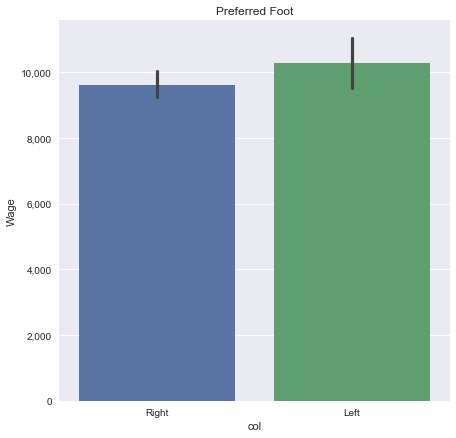

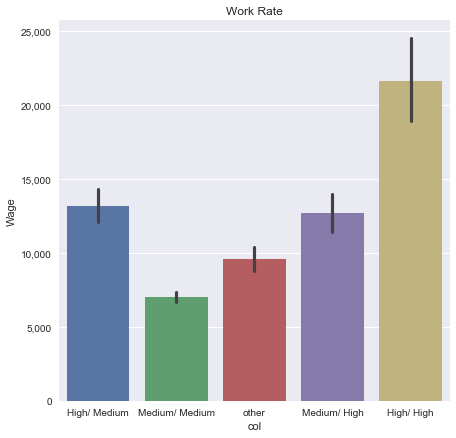

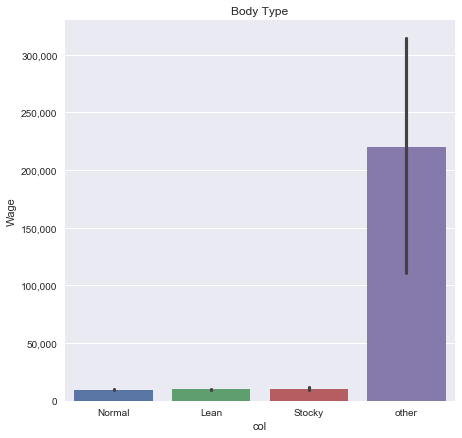

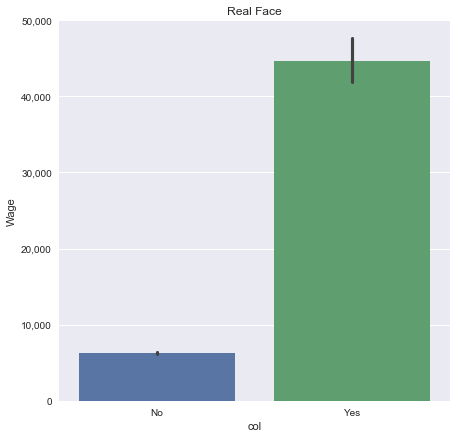

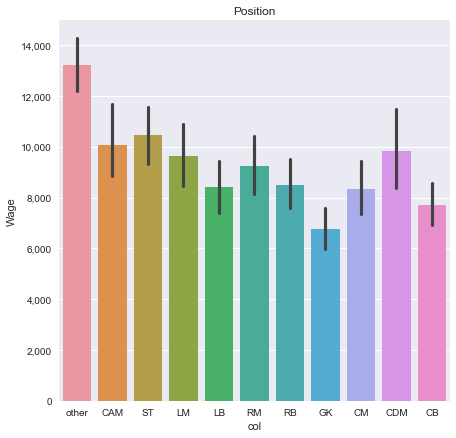

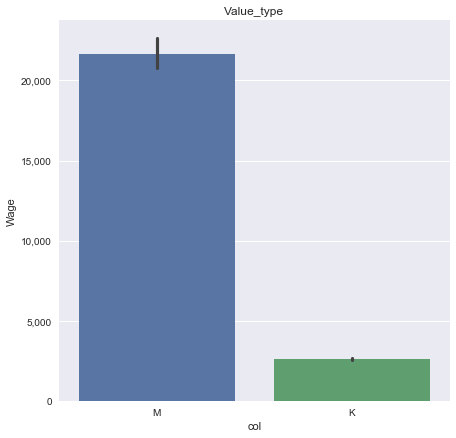

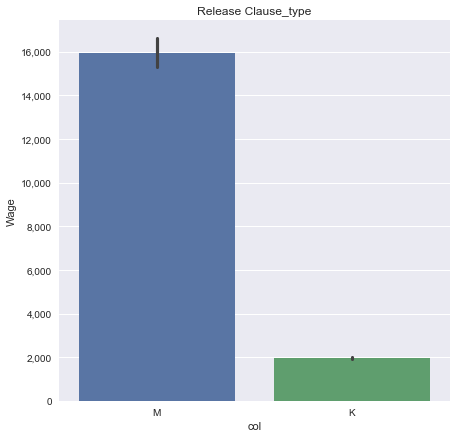

In [31]:
for col in cat_cols :
   
        plt.figure(figsize=(7,7))
        ax = sns.barplot(data=train, x= col, y = 'Wage')
        ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
        ax.set(xlabel="col", ylabel='Wage')
        ax.set(ylabel = 'Wage')
        plt.title(col)
        plt.show()

### bar plot insights:
    1. some features have significant mean wage difference like : real face, position
    2. and some dont like preffred foot

### create dummy variables for cat _cols

In [16]:
train_dummies = pd.get_dummies(train[cat_cols])
test_dummies = pd.get_dummies(test[cat_cols])

dummy_cols = train_dummies.columns.tolist()

train = pd.concat([train,train_dummies],axis=1)
test = pd.concat([test,test_dummies],axis=1)


for c in dummy_cols:
    if c not in test.columns.tolist():
        test[c] = 0


In [33]:
set(list(train.columns))-set(list(test.columns))

{'Wage'}

In [17]:
x_vector_cols = num_cols + dummy_cols

#cast

for c in x_vector_cols:
    train[c] = train[c].fillna(0).astype(int)
    test[c] = test[c].fillna(0).astype(int) # must do later better imputation

In [20]:
x_vector_cols = list(set(x_vector_cols))

### modelling.

### define a function that trains cv xgboost regressor and return the last model

In [21]:
def train_model_reg(X,Y,y_col='y'):
    '''
    
    function that trains cross validated xgboost regressor.
    
    param X : pd.DataFrame
    param Y : pd.DataFrame
    
    returns dict with keys : "test_rmse","train_rmse","model","best_iters"
    
    '''
    
    kf = KFold(n_splits=3,shuffle=True)
    
    rmse_test=[]
    rmse_train=[]
    best_iters=[]
    
    for train_index, test_index in kf.split(X, 
                                             Y):
        print(train_index)
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y[y_col].iloc[train_index], Y[y_col].iloc[test_index]
        
        param = {"objective" :'reg:linear',
                                     "colsample_bytree":0.8,
                                    "learning_rate":0.03,
                                     "max_depth":12,
                                     "subsample":1,
                                     "seed":42,
                                     'eval_metric': 'rmse',
                                     #'base_score': 0.2,
                                     'alpha':5
                                         }
        num_round=100
        progress={}

        #weight=np.where(y_train["answer"]==1,1,0.7)
        dtrain = xgb.DMatrix(X_train, label=y_train)  #,weight=weight
        dtest = xgb.DMatrix(X_test, label=y_test)
        
        watchlist=[(dtrain,'train'),(dtest,'test')]
        
        bst = xgb.train(param, dtrain,num_round,evals=watchlist,early_stopping_rounds=5,evals_result=progress)
        
        
        
        preds_test = bst.predict(dtest)
        preds_train = bst.predict(dtrain)
        
        
        train_rmse = mean_squared_error(y_train, preds_train)
        test_rmse = mean_squared_error(y_test, preds_test)


        
        rmse_test.append(test_rmse)
        rmse_train.append(train_rmse)
        best_iters.append(bst.best_iteration)
        
        
        plt.plot([i for i in range(num_round)],progress["train"]["rmse"],label="train")
        plt.plot([i for i in range(num_round)],progress["test"]["rmse"],label="train")
        plt.xlabel('iteration')
        plt.ylabel('rmse')
        plt.show()
        
    
    #print("test mean: {0}  train mean: {1}".format(np.mean(auc),np.mean(auc_train)))
    return {"test_rmse":test_rmse,"train_rmse":rmse_train,"model":bst,"best_iters":best_iters}

[    1     2     3 ... 14557 14558 14560]
[22:34:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:23193.8	test-rmse:24114.1
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 5 rounds.
[1]	train-rmse:22606.8	test-rmse:23591.6
[2]	train-rmse:22038.8	test-rmse:23114.8
[3]	train-rmse:21478.4	test-rmse:22618.2
[4]	train-rmse:20933.4	test-rmse:22182
[5]	train-rmse:20402.6	test-rmse:21734.4
[6]	train-rmse:19886.4	test-rmse:21316.5
[7]	train-rmse:19383.8	test-rmse:20893.2
[8]	train-rmse:18903.2	test-rmse:20497
[9]	train-rmse:18430.3	test-rmse:20129.6
[10]	train-rmse:17971.8	test-rmse:19720.6
[11]	train-rmse:17524.7	test-rmse:19338.8
[12]	train-rmse:17086.5	test-rmse:18987.1
[13]	train-rmse:16664.3	test-rmse:18661.9
[14]	train-rmse:16252.1	test-rmse:18357.5
[15]	train-rmse:15852.9	test-rmse:18

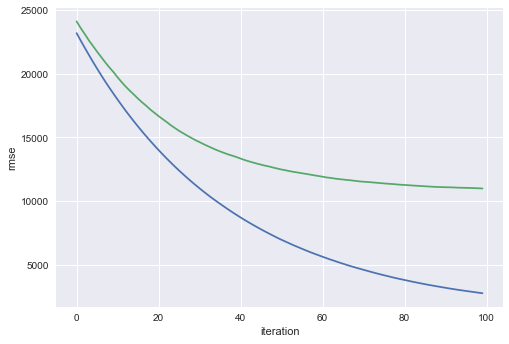

[    0     1     2 ... 14562 14563 14564]
[22:34:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:23549	test-rmse:23344.2
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 5 rounds.
[1]	train-rmse:22951.1	test-rmse:22823.7
[2]	train-rmse:22370	test-rmse:22302.8
[3]	train-rmse:21801.8	test-rmse:21815.4
[4]	train-rmse:21247.2	test-rmse:21346.8
[5]	train-rmse:20708.2	test-rmse:20892.1
[6]	train-rmse:20184.5	test-rmse:20455.6
[7]	train-rmse:19679.2	test-rmse:20053.8
[8]	train-rmse:19187.3	test-rmse:19646
[9]	train-rmse:18709	test-rmse:19264
[10]	train-rmse:18244.7	test-rmse:18875.8
[11]	train-rmse:17791.6	test-rmse:18507.5
[12]	train-rmse:17351.2	test-rmse:18160.5
[13]	train-rmse:16922.4	test-rmse:17800.8
[14]	train-rmse:16504.4	test-rmse:17468.5
[15]	train-rmse:16099.3	test-rmse:17167.7


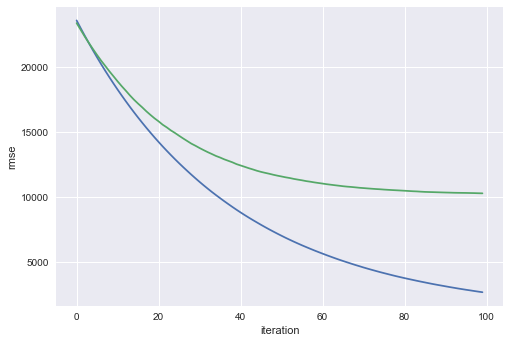

[    0     3     6 ... 14562 14563 14564]
[22:34:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:23643.2	test-rmse:23110.7
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 5 rounds.
[1]	train-rmse:23039.8	test-rmse:22625.7
[2]	train-rmse:22462.2	test-rmse:22093.8
[3]	train-rmse:21895.3	test-rmse:21592.1
[4]	train-rmse:21341.3	test-rmse:21075.7
[5]	train-rmse:20802.8	test-rmse:20652.4
[6]	train-rmse:20279.9	test-rmse:20234
[7]	train-rmse:19771.3	test-rmse:19823
[8]	train-rmse:19280.1	test-rmse:19385.7
[9]	train-rmse:18800.6	test-rmse:19010.4
[10]	train-rmse:18333.4	test-rmse:18633.3
[11]	train-rmse:17878.5	test-rmse:18266.9
[12]	train-rmse:17438.3	test-rmse:17933.6
[13]	train-rmse:17010.2	test-rmse:17598.7
[14]	train-rmse:16595.1	test-rmse:17279.2
[15]	train-rmse:16183	test-rmse:1698

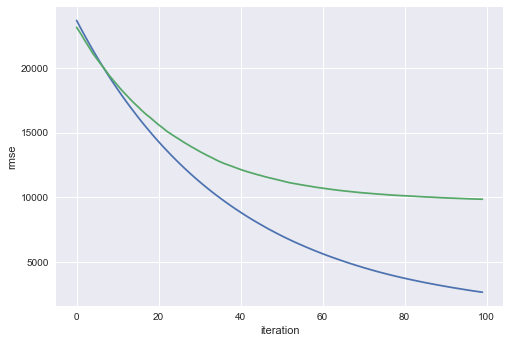

In [22]:
train = train.dropna(subset=['Wage'])
res = train_model_reg(train[x_vector_cols],train[['Wage']],'Wage')

### with this parameter (high depth) weve reached a overfitting.

### define and use a function that plots the feature importance of our ensemble model.

In [44]:
def importance(model,importance_type='gain',write=False,path=""):
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca()
    xgb.plot_importance(model, max_num_features=30, height=0.8, ax=ax,importance_type=importance_type)
    if write:
       plt.savefig('{}/importance.png'.format(path))

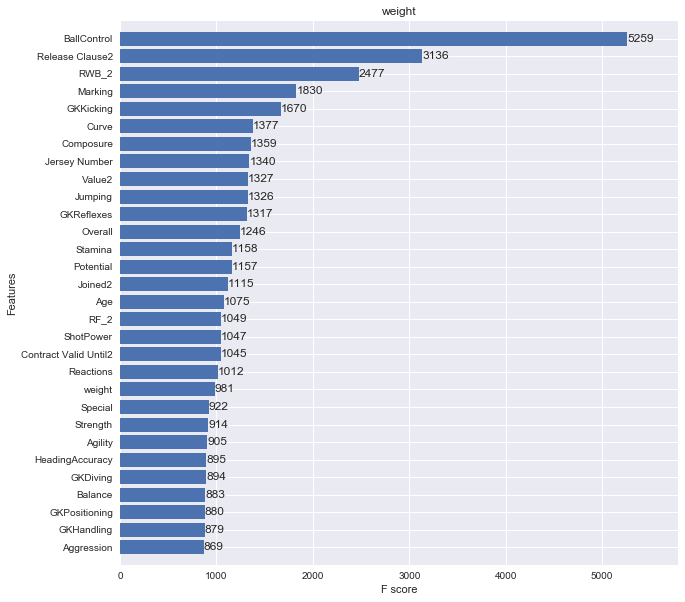

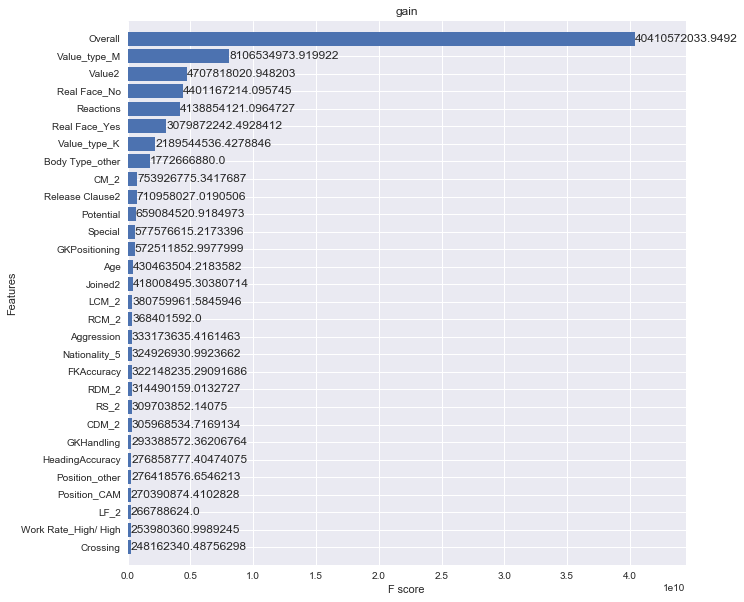

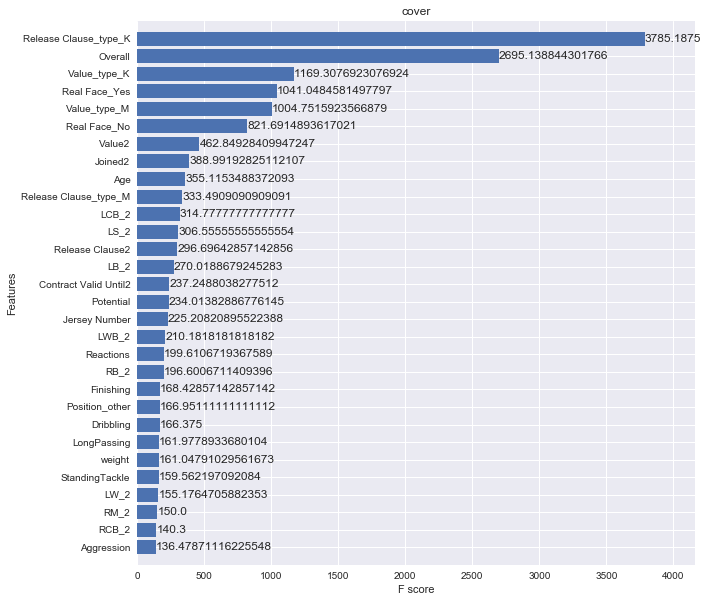

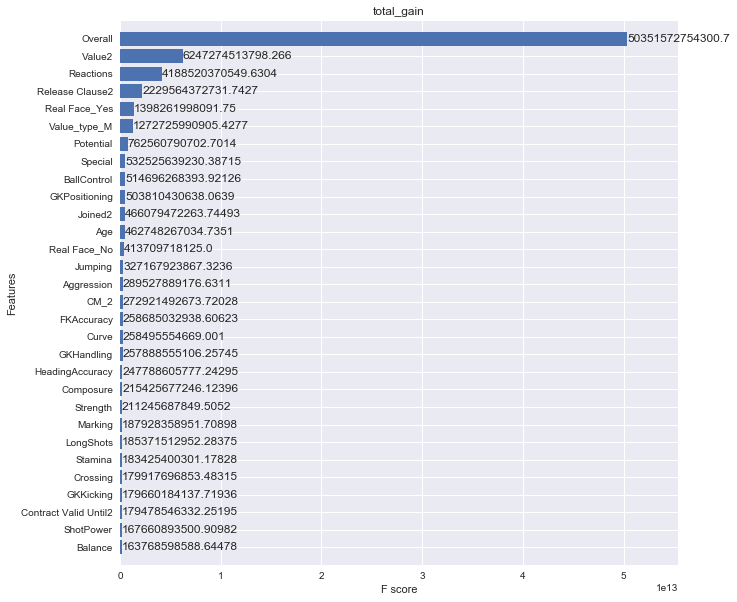

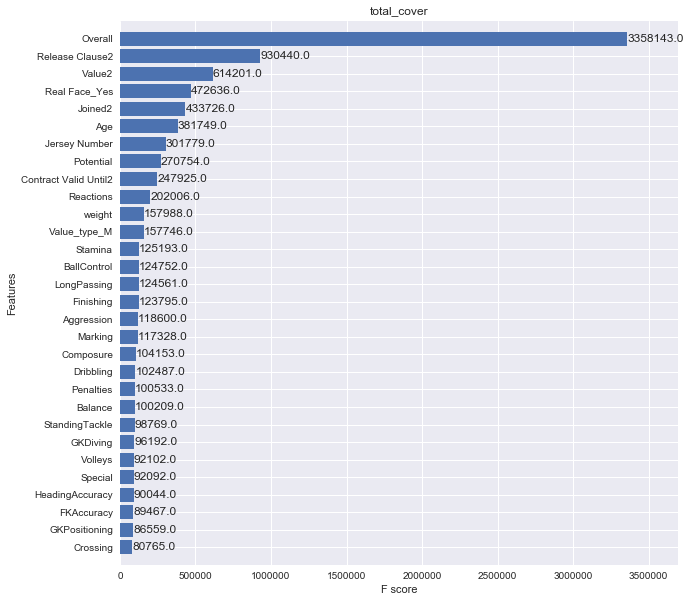

In [45]:
importance_types = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
for f in importance_types :
    importance(res["model"],importance_type=f)
    plt.title(f)
    plt.show()

### importance insights:
    1. highest gain feature is Overall, and the gain drops dramaticaly.
    2. highes cover featues are the Value type if its in K or M

### investigate shap values

In [ ]:
shap_values = shap.TreeExplainer(res["model"]).shap_values(train[x_vector_cols])

In [ ]:
shap.summary_plot(shap_values, test[x_vector_cols])

In [ ]:
shap.dependence_plot("Overall", shap_values, test[x_vector_cols])

In [35]:
test["pred"] = res["model"].predict(xgb.DMatrix(test[x_vector_cols]))
test[["pred"]].to_csv("C:/Users/davidog16/Downloads/test_data_pred.csv")
test.to_csv("C:/Users/davidog16/Downloads/test_data_pred.csv")